In [1]:
!pip install statsmodels

^C


In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import gc
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
zip_path = "Data.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("Data")  # Change the folder name if needed


In [3]:
climate_zip_path = "Climate_data.zip"
# Extract it
with zipfile.ZipFile(climate_zip_path, 'r') as zip_ref:
    zip_ref.extractall("ClimateData")  # Change the folder name if needed


In [4]:
all_data_df = pd.read_csv("./Data/Data.csv")
ss = pd.read_csv("SampleSubmission.csv")

In [6]:
### CHANGE NAME OF FOLDER AND FILES TO CORRESPOND ####
climate_data=pd.read_excel("./ClimateData/Climate Data/Kalam Climate Data.xlsx")
climate_data.head

<bound method NDFrame.head of                 Date Time  Temperature (°C)  Dewpoint Temperature (°C)  \
0     2023-06-03 13:00:00          7.199731                  -2.448126   
1     2023-06-03 14:00:00          6.000620                  -2.597540   
2     2023-06-03 15:00:00          4.789972                  -2.696951   
3     2023-06-03 16:00:00          3.158746                  -2.879324   
4     2023-06-03 17:00:00          1.671426                  -3.255606   
...                   ...               ...                        ...   
12223 2024-10-24 20:00:00         -5.387305                  -5.942435   
12224 2024-10-24 21:00:00         -6.008307                  -6.837256   
12225 2024-10-24 22:00:00         -6.535742                  -7.863989   
12226 2024-10-24 23:00:00         -6.864859                  -8.328970   
12227 2024-10-25 00:00:00         -7.224661                  -8.735220   

       U Wind Component (m/s)  V Wind Component (m/s)  \
0                   -0.0

In [7]:
# Count the number of missing values per feature
missing_values = climate_data.isnull().sum()

# Display columns with missing values and their count
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [8]:
import pandas as pd

# Ensure "Date Time" is in datetime format
climate_data["Date Time"] = pd.to_datetime(climate_data["Date Time"])

# Extract the date part
climate_data["Date"] = climate_data["Date Time"].dt.date

# Group by the date and compute the average
daily_avg_climate = climate_data.groupby("Date").mean()

# Reset index to make it a clean DataFrame
daily_avg_climate.reset_index(inplace=True)
daily_avg_climate = daily_avg_climate.drop(columns=["Date Time"])

# Display the first few rows
print(daily_avg_climate.head())
daily_avg_climate.columns




         Date  Temperature (°C)  Dewpoint Temperature (°C)  \
0  2023-06-03          1.860280                  -3.348664   
1  2023-06-04          3.992740                  -1.905203   
2  2023-06-05          4.794523                  -3.781657   
3  2023-06-06          6.304390                  -4.670615   
4  2023-06-07          7.003922                  -3.965763   

   U Wind Component (m/s)  V Wind Component (m/s)  Total Precipitation (mm)  \
0                0.025054               -0.657726                  0.000414   
1               -0.180909               -0.505298                  0.001004   
2               -0.145114               -0.498183                  0.000482   
3                0.018054               -0.478623                  0.000371   
4                0.083701               -0.516598                  0.000360   

   Snowfall (mm)  Snow Cover (%)  
0   0.000000e+00       99.972656  
1   0.000000e+00       99.972656  
2   4.858333e-08       99.972656  
3   2.175000

Index(['Date', 'Temperature (°C)', 'Dewpoint Temperature (°C)',
       'U Wind Component (m/s)', 'V Wind Component (m/s)',
       'Total Precipitation (mm)', 'Snowfall (mm)', 'Snow Cover (%)'],
      dtype='object')

In [9]:
len(ss)

6014

In [10]:
all_data_df.columns

Index(['date_time', 'v_red', 'current', 'power_factor', 'kwh', 'Source',
       'v_blue', 'v_yellow', 'consumer_device_9', 'consumer_device_x'],
      dtype='object')

In [11]:
all_data_df.head(10)

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_9,consumer_device_x
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,0,10
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,0,10
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,0,10
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,0,10
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,0,10
5,2024-07-22 18:45:00,128.87,0.08,0.74,0.000636,consumer_device_10_data_user_1,NaN,NaN,0,10
6,2024-07-22 18:50:00,122.40,0.08,0.72,0.000588,consumer_device_10_data_user_1,NaN,NaN,0,10
7,2024-07-22 18:55:00,115.22,0.09,0.76,0.000657,consumer_device_10_data_user_1,NaN,NaN,0,10
8,2024-07-22 19:00:00,104.07,0.10,0.77,0.000668,consumer_device_10_data_user_1,NaN,NaN,0,10
9,2024-07-22 19:05:00,95.49,0.10,0.73,0.000581,consumer_device_10_data_user_1,NaN,NaN,0,10


In [12]:
all_data_df.groupby("consumer_device_x")["consumer_device_9"].mean()


consumer_device_x
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: consumer_device_9, dtype: float64

Consumer_device_9 could be dropped unuseful

In [13]:
# Split 'Source' into 'consumer_device_X' and 'data_user_Y'
all_data_df[['consumer_device', 'data_user']] = all_data_df['Source'].str.extract(r'(consumer_device_\d+)_data_user_(\d+)')

# Display the updated DataFrame (optional)
all_data_df.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_9,consumer_device_x,consumer_device,data_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,0,10,consumer_device_10,1
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,0,10,consumer_device_10,1
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,0,10,consumer_device_10,1
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,0,10,consumer_device_10,1
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,0,10,consumer_device_10,1


In [14]:
# Count the number of missing values per feature
missing_values = all_data_df.isnull().sum()

# Display columns with missing values and their count
print(missing_values[missing_values > 0])
# Calculate the percentage of missing values per feature
missing_percentage = (all_data_df.isnull().mean()) * 100

# Display columns with missing values and their percentage
print(missing_percentage[missing_percentage > 0])

v_red       25328292
v_blue      26899165
v_yellow    26067661
dtype: int64
v_red       64.699544
v_blue      68.712241
v_yellow    66.588216
dtype: float64


In [15]:
# Step 1: Group by 'Source' and calculate the average of non-zero values for each feature
def fill_na_with_avg(group):
    # Calculate the average of non-zero values for each feature
    avg_v_red = group['v_red'][group['v_red'] > 0].mean() if (group['v_red'] > 0).any() else 0  # Default to 0 if no non-zero values
    avg_v_blue = group['v_blue'][group['v_blue'] > 0].mean() if (group['v_blue'] > 0).any() else 0  # Default to 0 if no non-zero values
    avg_v_yellow = group['v_yellow'][group['v_yellow'] > 0].mean() if (group['v_yellow'] > 0).any() else 0  # Default to 0 if no non-zero values

    # Fill NaN values with the calculated averages (keeping non-zero values as is)
    group['v_red'] = group['v_red'].fillna(avg_v_red)
    group['v_blue'] = group['v_blue'].fillna(avg_v_blue)
    group['v_yellow'] = group['v_yellow'].fillna(avg_v_yellow)
    
    return group

# Step 2: Apply the function to each group
all_data_filled = all_data_df.groupby('Source').apply(fill_na_with_avg)
all_data_filled = all_data_filled.reset_index(drop=True)

# Display the result
print(all_data_filled.head())
# Count the number of non-zero entries per row (i.e., per source)
# Step 1: Check for non-zero values for each feature
non_zero_count_per_source = all_data_filled.groupby('Source')[['v_red', 'v_blue', 'v_yellow']].apply(
    lambda x: (x > 0).sum()
)

# Display the result
print(non_zero_count_per_source.head())
num_non_zero_features = (non_zero_count_per_source > 0).sum(axis=1)

# Count how many sources have exactly 1 non-zero feature
sources_with_one_non_zero = (num_non_zero_features == 1).sum()

# Compute the percentage
total_sources = len(num_non_zero_features)
percentage_one_non_zeros = (sources_with_one_non_zero / total_sources) * 100

# Print the result
print(f"Percentage of sources with one non-zero feature: {percentage_one_non_zeros:.2f}%")


             date_time   v_red  current  power_factor       kwh  \
0  2024-07-22 18:20:00  137.65     0.08          0.72  0.000661   
1  2024-07-22 18:25:00  122.82     0.08          0.73  0.000598   
2  2024-07-22 18:30:00  119.70     0.08          0.74  0.000591   
3  2024-07-22 18:35:00  124.53     0.08          0.75  0.000623   
4  2024-07-22 18:40:00  134.84     0.08          0.74  0.000665   

                           Source  v_blue  v_yellow  consumer_device_9  \
0  consumer_device_10_data_user_1     0.0       0.0                  0   
1  consumer_device_10_data_user_1     0.0       0.0                  0   
2  consumer_device_10_data_user_1     0.0       0.0                  0   
3  consumer_device_10_data_user_1     0.0       0.0                  0   
4  consumer_device_10_data_user_1     0.0       0.0                  0   

   consumer_device_x     consumer_device data_user  
0                 10  consumer_device_10         1  
1                 10  consumer_device_10      

In [16]:
df_clean = all_data_filled.copy()  # Create a copy to keep the original data intact
df_clean.drop(columns=["consumer_device_9"], inplace=True)  # Drop the column

# Display the first few rows to confirm
df_clean.head()


,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_x,consumer_device,data_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,0.0,0.0,10,consumer_device_10,1
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,0.0,0.0,10,consumer_device_10,1
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,0.0,0.0,10,consumer_device_10,1
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,0.0,0.0,10,consumer_device_10,1
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,0.0,0.0,10,consumer_device_10,1


# CLEANING

In [17]:
# Split 'Source' into two new columns
df_clean[['consumer_device', 'data_user']] = df_clean['Source'].str.split('_data_user_', expand=True)

# Convert `data_user` to an integer
df_clean['data_user'] = df_clean['data_user'].astype(int)


In [18]:
# Drop the redundant column of consumer device, keep only integer format
df_clean.drop(columns=['consumer_device'], inplace=True)

df_clean.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_x,data_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,0.0,0.0,10,1
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,0.0,0.0,10,1
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,0.0,0.0,10,1
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,0.0,0.0,10,1
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,0.0,0.0,10,1


In [19]:
# Vectorized approach for classifying phase_type
df_clean['phase_type'] = 'single-phase'  # Default to 'single-phase'
df_clean.loc[(df_clean['v_blue'] > 0) | (df_clean['v_yellow'] > 0), 'phase_type'] = 'three-phase'

# Check the result
df_clean.head()



,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_x,data_user,phase_type
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,0.0,0.0,10,1,single-phase
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,0.0,0.0,10,1,single-phase
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,0.0,0.0,10,1,single-phase
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,0.0,0.0,10,1,single-phase
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,0.0,0.0,10,1,single-phase


In [20]:
# These are the devices that are not in the test SampleSubmission

devices_to_drop = ["consumer_device_3","consumer_device_5","consumer_device_11", "consumer_device_14",
                   "consumer_device_15", "consumer_device_17", "consumer_device_24",
                   "consumer_device_25","consumer_device_27","consumer_device_33","consumer_device_4","consumer_device_9"]

In [21]:
filtered_df = df_clean[df_clean['Source'].str.startswith(tuple(devices_to_drop))]
filtered_df.head()


,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_x,data_user,phase_type
327816,2023-10-01 14:35:00,169.26,3.50,0.73,0.036038,consumer_device_11_data_user_1,0.0,0.0,11,1,single-phase
327817,2023-10-01 14:40:00,169.20,3.15,0.76,0.033755,consumer_device_11_data_user_1,0.0,0.0,11,1,single-phase
327818,2023-10-01 14:45:00,168.38,2.58,0.73,0.026427,consumer_device_11_data_user_1,0.0,0.0,11,1,single-phase
327819,2023-10-01 14:50:00,168.87,2.52,0.76,0.026952,consumer_device_11_data_user_1,0.0,0.0,11,1,single-phase
327820,2023-10-01 14:55:00,168.30,2.47,0.75,0.025981,consumer_device_11_data_user_1,0.0,0.0,11,1,single-phase


In [22]:
import pandas as pd

# Convert 'date_time' column to datetime if not already
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'])

# Extract the date part
df_clean['Date'] = df_clean['date_time'].dt.date

# Extract the unique 'phase_type' for each 'Source'
source_phase_mapping = df_clean.groupby('Source')['phase_type'].first().reset_index()

# Group by 'Source' and 'Date'
aggregated_data_clean = df_clean.groupby(['Source', 'Date']).agg({
    'kwh': 'sum',  # Sum of kwh
    'v_blue': 'mean',  # Average voltage blue
    'v_yellow': 'mean',  # Average voltage yellow
    'v_red': 'mean',  # Average voltage red
    'current': 'mean',  # Average current
    'power_factor': 'mean'  # Average power factor
}).reset_index()

# Merge 'phase_type' back into the aggregated dataset
aggregated_data_clean = aggregated_data_clean.merge(source_phase_mapping, on='Source', how='left')

# Display the result
aggregated_data_clean.head()


,Source,Date,kwh,v_blue,v_yellow,v_red,current,power_factor,phase_type
0,consumer_device_10_data_user_1,2024-07-22,0.024330,0.0,0.0,99.162941,0.079853,0.384118,single-phase
1,consumer_device_10_data_user_1,2024-07-23,0.103560,0.0,0.0,101.665556,0.060486,0.342986,single-phase
2,consumer_device_10_data_user_1,2024-07-24,0.137543,0.0,0.0,100.080938,0.074063,0.399896,single-phase
3,consumer_device_10_data_user_1,2024-07-25,0.121011,0.0,0.0,101.122604,0.082743,0.356250,single-phase
4,consumer_device_10_data_user_1,2024-07-26,0.000000,0.0,0.0,32.168472,0.000000,0.000000,single-phase


In [23]:
# Merge 'aggregated_data_clean' with 'daily_avg_climate' based on 'Date'
all_data_agg = aggregated_data_clean.merge(daily_avg_climate, on='Date', how='left')

# Display the merged dataset to verify the results
print(all_data_agg.head())


                           Source        Date       kwh  v_blue  v_yellow  \
0  consumer_device_10_data_user_1  2024-07-22  0.024330     0.0       0.0   
1  consumer_device_10_data_user_1  2024-07-23  0.103560     0.0       0.0   
2  consumer_device_10_data_user_1  2024-07-24  0.137543     0.0       0.0   
3  consumer_device_10_data_user_1  2024-07-25  0.121011     0.0       0.0   
4  consumer_device_10_data_user_1  2024-07-26  0.000000     0.0       0.0   

        v_red   current  power_factor    phase_type  Temperature (°C)  \
0   99.162941  0.079853      0.384118  single-phase         14.719596   
1  101.665556  0.060486      0.342986  single-phase         13.217268   
2  100.080938  0.074063      0.399896  single-phase         12.462190   
3  101.122604  0.082743      0.356250  single-phase         13.867551   
4   32.168472  0.000000      0.000000  single-phase         15.572609   

   Dewpoint Temperature (°C)  U Wind Component (m/s)  V Wind Component (m/s)  \
0                 

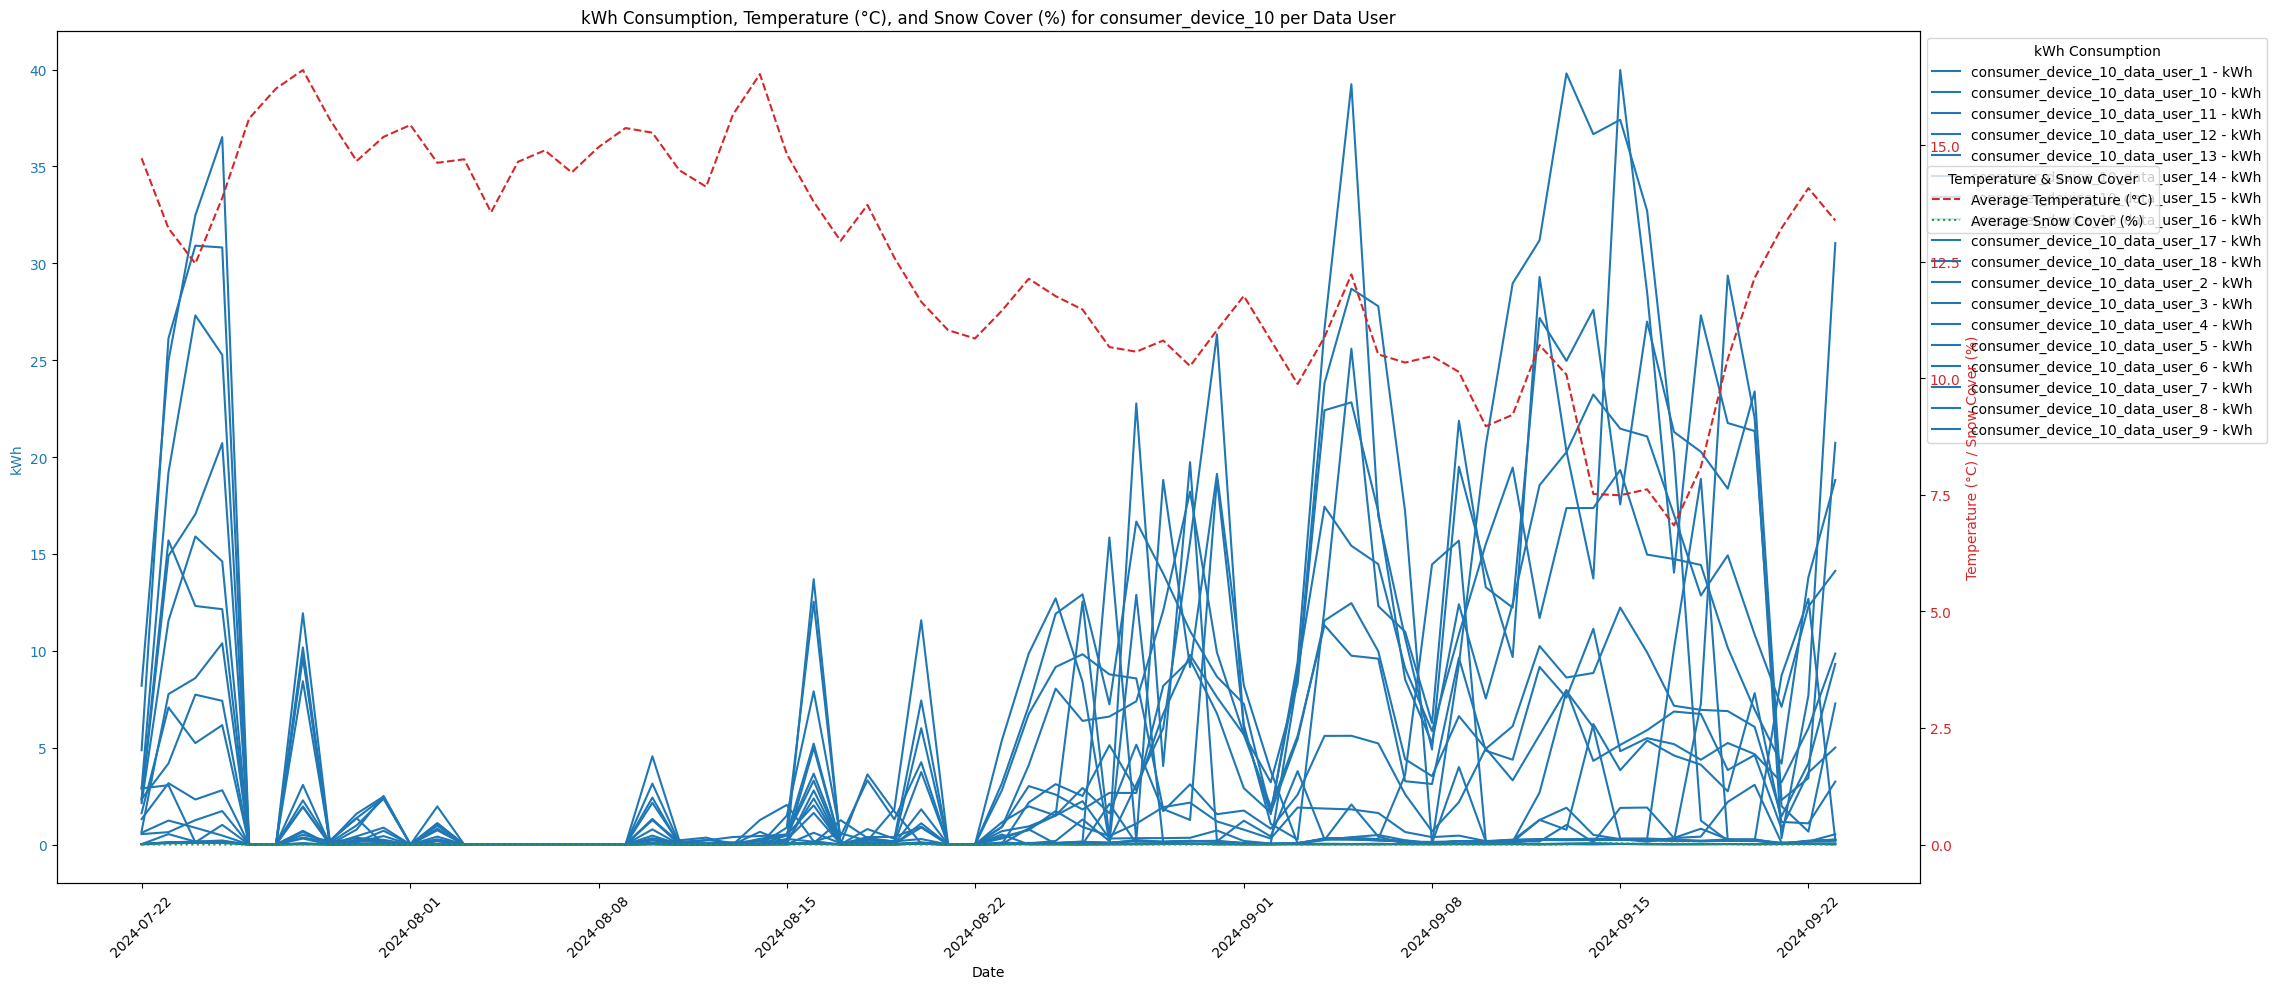

In [24]:
import matplotlib.pyplot as plt

 # Filter data for consumer_device_10
consumer_10_data = all_data_agg[all_data_agg['Source'].str.contains('consumer_device_10')]# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot kWh data
for data_user in consumer_10_data['Source'].unique():
    user_data = consumer_10_data[consumer_10_data['Source'] == data_user]
    ax1.plot(user_data['Date'], user_data['kwh'], label=f'{data_user} - kWh', color='tab:blue')

# Set up the first axis for kWh
ax1.set_xlabel('Date')
ax1.set_ylabel('kWh', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for temperature and snow cover
ax2 = ax1.twinx()

# Plot Temperature and Snow Cover data (only once for each date)
ax2.plot(consumer_10_data['Date'].unique(), 
         consumer_10_data.groupby('Date')['Temperature (°C)'].mean(), 
         label='Average Temperature (°C)', linestyle='--', color='tab:red')

ax2.plot(consumer_10_data['Date'].unique(), 
         consumer_10_data.groupby('Date')['Snow Cover (%)'].mean(), 
         label='Average Snow Cover (%)', linestyle=':', color='tab:green')

# Set up the second axis for temperature and snow cover
ax2.set_ylabel('Temperature (°C) / Snow Cover (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set plot title and adjust layout for better fit
plt.title('kWh Consumption, Temperature (°C), and Snow Cover (%) for consumer_device_10 per Data User')
fig.tight_layout()

# Add legends (combining all labels)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), title="kWh Consumption")
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.85), title="Temperature & Snow Cover")

# Show the plot
plt.show()


In [25]:
# Find the minimum and maximum date_time values
min_date = aggregated_data_clean['Date'].min()
max_date = aggregated_data_clean['Date'].max()

print(f"Minimum date_time: {min_date}")
print(f"Maximum date_time: {max_date}")

Minimum date_time: 2023-06-03
Maximum date_time: 2024-09-23


In [26]:
# Fill missing date values with 0 kwh

# Create a date range
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')

# Create an empty DataFrame to store the complete data
complete_data = pd.DataFrame()

# Iterate through each unique 'Source'
for source in all_data_agg['Source'].unique():
    # Extract data for the current 'Source'
    source_data = all_data_agg[all_data_agg['Source'] == source].copy()

    # Convert the source data Date to match the type of date_rng
    source_data['Date'] = pd.to_datetime(source_data['Date'])

    # Create a complete date range for the current 'Source'
    source_date_rng = pd.DataFrame({'Date': date_rng})
    source_date_rng['Source'] = source

    # Merge with the existing data, filling missing 'kwh' values with 0
    source_data = pd.merge(source_date_rng, source_data, on=['Date', 'Source'], how='left')
    source_data['phase_type'] = source_data['phase_type'].fillna('single-phase')
     # Fill NaN values in all numerical columns
    source_data.fillna(0, inplace=True)

    # Append to the complete data
    complete_data = pd.concat([complete_data, source_data], ignore_index=True)

In [27]:
complete_data.head()

,Date,Source,kwh,v_blue,v_yellow,v_red,current,power_factor,phase_type,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
0,2023-06-03,consumer_device_10_data_user_1,0.0,0.0,0.0,0.0,0.0,0.0,single-phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-06-04,consumer_device_10_data_user_1,0.0,0.0,0.0,0.0,0.0,0.0,single-phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-06-05,consumer_device_10_data_user_1,0.0,0.0,0.0,0.0,0.0,0.0,single-phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-06-06,consumer_device_10_data_user_1,0.0,0.0,0.0,0.0,0.0,0.0,single-phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-06-07,consumer_device_10_data_user_1,0.0,0.0,0.0,0.0,0.0,0.0,single-phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to process and forecast per unique consumer_device_x and data_user_y with multiple features as exogenous variables
def forecast_sarimax(all_data, forecast_horizon=30, output_template=None):
    # Convert Date column to datetime format
    all_data['Date'] = pd.to_datetime(all_data['Date'])

    # Extract consumer_device_x and data_user_y
    all_data[['consumer_device', 'data_user']] = all_data['Source'].str.extract(r'consumer_device_(\d+)_data_user_(\d+)')

    # Ensure data is sorted by consumer_device, data_user, and Date
    all_data = all_data.sort_values(by=['consumer_device', 'data_user', 'Date'])

    # Store forecasts
    forecast_results = []

    # Process each unique consumer_device_x and data_user_y combination
    for (consumer_device, data_user), group in all_data.groupby(["consumer_device", "data_user"]):
        # Set Date as index
        group = group.set_index("Date")

        # Ensure data is in the correct format and fill missing dates with last known value
        group = group.asfreq('D').fillna(method='ffill')

        # Define exogenous variables (all features to be used for prediction)
        exog_features = [
            'current', 'v_blue', 'v_yellow', 'v_red', 'power_factor',  # Consumer-related features
            'Temperature (°C)', 'Dewpoint Temperature (°C)', 
            'U Wind Component (m/s)', 'V Wind Component (m/s)', 
            'Total Precipitation (mm)', 'Snow Cover (%)'  # Environmental features
        ]

        # Check if all exogenous features are present
        exog_data = group[exog_features].fillna(0)  # Fill missing exogenous data with 0 (or another method)

        # Fit SARIMAX model (with exogenous variables)
        try:
            model = SARIMAX(group['kwh'], exog=exog_data, order=(5, 1, 0))  # SARIMAX(5,1,0) as a baseline
            fitted_model = model.fit()

            # Forecast for the next forecast_horizon days
            forecast_dates = pd.date_range(start=group.index[-1] + pd.Timedelta(days=1),
                                           periods=forecast_horizon, freq='D')
            # Prepare exogenous variables for forecast
            forecast_exog = exog_data.tail(1).copy()  # Use the last available day as the forecast input
            forecast_exog = pd.concat([forecast_exog] * forecast_horizon, ignore_index=True)

            # Forecast using the SARIMAX model
            forecast_values = fitted_model.forecast(steps=forecast_horizon, exog=forecast_exog)

            # Store results in the required format
            forecast_df = pd.DataFrame({
                "ID": [f"{date.strftime('%Y-%m-%d')}_consumer_device_{consumer_device}_data_user_{data_user}"
                        for date in forecast_dates],
                "kwh": forecast_values
            })

            forecast_results.append(forecast_df)

        except Exception as e:
            print(f"Error processing {consumer_device}_{data_user}: {e}")

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)

    # If an output template is provided, align the output format
    if output_template is not None:
        output_template = output_template.drop(columns=['kwh'], errors='ignore')
        final_output = output_template.merge(forecast_df, on='ID', how='left').fillna(0)
    else:
        final_output = forecast_df

    return final_output


In [38]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to process and forecast per unique consumer_device_x and data_user_y with multiple features as exogenous variables
def forecast_sarimax_no_consfeat(all_data, forecast_horizon=30, output_template=None):
    # Convert Date column to datetime format
    all_data['Date'] = pd.to_datetime(all_data['Date'])

    # Extract consumer_device_x and data_user_y
    all_data[['consumer_device', 'data_user']] = all_data['Source'].str.extract(r'consumer_device_(\d+)_data_user_(\d+)')

    # Ensure data is sorted by consumer_device, data_user, and Date
    all_data = all_data.sort_values(by=['consumer_device', 'data_user', 'Date'])

    # Store forecasts
    forecast_results = []

    # Process each unique consumer_device_x and data_user_y combination
    for (consumer_device, data_user), group in all_data.groupby(["consumer_device", "data_user"]):
        # Set Date as index
        group = group.set_index("Date")

        # Ensure data is in the correct format and fill missing dates with last known value
        group = group.asfreq('D').fillna(method='ffill')

        # Define exogenous variables (all features to be used for prediction)
        exog_features = [  # Consumer-related features
            'Temperature (°C)', 'U Wind Component (m/s)', 'Snow Cover (%)'  # Environmental features
        ]

        # Check if all exogenous features are present
        exog_data = group[exog_features].fillna(0)  # Fill missing exogenous data with 0 (or another method)

        # Fit SARIMAX model (with exogenous variables)
        try:
            model = SARIMAX(group['kwh'], exog=exog_data, order=(5, 1, 0))  # SARIMAX(5,1,0) as a baseline
            fitted_model = model.fit()

            # Forecast for the next forecast_horizon days
            forecast_dates = pd.date_range(start=group.index[-1] + pd.Timedelta(days=1),
                                           periods=forecast_horizon, freq='D')
            # Prepare exogenous variables for forecast
            forecast_exog = exog_data.tail(1).copy()  # Use the last available day as the forecast input
            forecast_exog = pd.concat([forecast_exog] * forecast_horizon, ignore_index=True)

            # Forecast using the SARIMAX model
            forecast_values = fitted_model.forecast(steps=forecast_horizon, exog=forecast_exog)

            # Store results in the required format
            forecast_df = pd.DataFrame({
                "ID": [f"{date.strftime('%Y-%m-%d')}_consumer_device_{consumer_device}_data_user_{data_user}"
                        for date in forecast_dates],
                "kwh": forecast_values
            })

            forecast_results.append(forecast_df)

        except Exception as e:
            print(f"Error processing {consumer_device}_{data_user}: {e}")

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)

    # If an output template is provided, align the output format
    if output_template is not None:
        output_template = output_template.drop(columns=['kwh'], errors='ignore')
        final_output = output_template.merge(forecast_df, on='ID', how='left').fillna(0)
    else:
        final_output = forecast_df

    return final_output


In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to process and forecast per unique consumer_device_x and data_user_y with multiple features as exogenous variables
def forecast_sarimax_mix(all_data, forecast_horizon=30, output_template=None):
    # Convert Date column to datetime format
    all_data['Date'] = pd.to_datetime(all_data['Date'])

    # Extract consumer_device_x and data_user_y
    all_data[['consumer_device', 'data_user']] = all_data['Source'].str.extract(r'consumer_device_(\d+)_data_user_(\d+)')

    # Ensure data is sorted by consumer_device, data_user, and Date
    all_data = all_data.sort_values(by=['consumer_device', 'data_user', 'Date'])

    # Store forecasts
    forecast_results = []

    # Process each unique consumer_device_x and data_user_y combination
    for (consumer_device, data_user), group in all_data.groupby(["consumer_device", "data_user"]):
        # Set Date as index
        group = group.set_index("Date")

        # Ensure data is in the correct format and fill missing dates with last known value
        group = group.asfreq('D').fillna(method='ffill')

        # Define exogenous variables (all features to be used for prediction)
        exog_features = [
            'current', 'v_blue', 'v_yellow', 'v_red', 'power_factor',  # Consumer-related features
            'Temperature (°C)', 
            'U Wind Component (m/s)', 'Snow Cover (%)'  # Environmental features
        ]

        # Check if all exogenous features are present
        exog_data = group[exog_features].fillna(0)  # Fill missing exogenous data with 0 (or another method)

        # Fit SARIMAX model (with exogenous variables)
        try:
            model = SARIMAX(group['kwh'], exog=exog_data, order=(5, 1, 0))  # SARIMAX(5,1,0) as a baseline
            fitted_model = model.fit()

            # Forecast for the next forecast_horizon days
            forecast_dates = pd.date_range(start=group.index[-1] + pd.Timedelta(days=1),
                                           periods=forecast_horizon, freq='D')
            # Prepare exogenous variables for forecast
            forecast_exog = exog_data.tail(1).copy()  # Use the last available day as the forecast input
            forecast_exog = pd.concat([forecast_exog] * forecast_horizon, ignore_index=True)

            # Forecast using the SARIMAX model
            forecast_values = fitted_model.forecast(steps=forecast_horizon, exog=forecast_exog)

            # Store results in the required format
            forecast_df = pd.DataFrame({
                "ID": [f"{date.strftime('%Y-%m-%d')}_consumer_device_{consumer_device}_data_user_{data_user}"
                        for date in forecast_dates],
                "kwh": forecast_values
            })

            forecast_results.append(forecast_df)

        except Exception as e:
            print(f"Error processing {consumer_device}_{data_user}: {e}")

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)

    # If an output template is provided, align the output format
    if output_template is not None:
        output_template = output_template.drop(columns=['kwh'], errors='ignore')
        final_output = output_template.merge(forecast_df, on='ID', how='left').fillna(0)
    else:
        final_output = forecast_df

    return final_output


In [40]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to process and forecast per unique consumer_device_x and data_user_y with multiple features as exogenous variables
def forecast_sarimax_no_temp(all_data, forecast_horizon=30, output_template=None):
    # Convert Date column to datetime format
    all_data['Date'] = pd.to_datetime(all_data['Date'])

    # Extract consumer_device_x and data_user_y
    all_data[['consumer_device', 'data_user']] = all_data['Source'].str.extract(r'consumer_device_(\d+)_data_user_(\d+)')

    # Ensure data is sorted by consumer_device, data_user, and Date
    all_data = all_data.sort_values(by=['consumer_device', 'data_user', 'Date'])

    # Store forecasts
    forecast_results = []

    # Process each unique consumer_device_x and data_user_y combination
    for (consumer_device, data_user), group in all_data.groupby(["consumer_device", "data_user"]):
        # Set Date as index
        group = group.set_index("Date")

        # Ensure data is in the correct format and fill missing dates with last known value
        group = group.asfreq('D').fillna(method='ffill')

        # Define exogenous variables (all features to be used for prediction)
        exog_features = [
            'current', 'v_blue', 'v_yellow', 'v_red', 'power_factor',  # Consumer-related features
             # Environmental features
        ]

        # Check if all exogenous features are present
        exog_data = group[exog_features].fillna(0)  # Fill missing exogenous data with 0 (or another method)

        # Fit SARIMAX model (with exogenous variables)
        try:
            model = SARIMAX(group['kwh'], exog=exog_data, order=(5, 1, 0))  # SARIMAX(5,1,0) as a baseline
            fitted_model = model.fit()

            # Forecast for the next forecast_horizon days
            forecast_dates = pd.date_range(start=group.index[-1] + pd.Timedelta(days=1),
                                           periods=forecast_horizon, freq='D')
            # Prepare exogenous variables for forecast
            forecast_exog = exog_data.tail(1).copy()  # Use the last available day as the forecast input
            forecast_exog = pd.concat([forecast_exog] * forecast_horizon, ignore_index=True)

            # Forecast using the SARIMAX model
            forecast_values = fitted_model.forecast(steps=forecast_horizon, exog=forecast_exog)

            # Store results in the required format
            forecast_df = pd.DataFrame({
                "ID": [f"{date.strftime('%Y-%m-%d')}_consumer_device_{consumer_device}_data_user_{data_user}"
                        for date in forecast_dates],
                "kwh": forecast_values
            })

            forecast_results.append(forecast_df)

        except Exception as e:
            print(f"Error processing {consumer_device}_{data_user}: {e}")

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)

    # If an output template is provided, align the output format
    if output_template is not None:
        output_template = output_template.drop(columns=['kwh'], errors='ignore')
        final_output = output_template.merge(forecast_df, on='ID', how='left').fillna(0)
    else:
        final_output = forecast_df

    return final_output


In [29]:
forecast = forecast_sarimax(all_data=complete_data, forecast_horizon=30, output_template=ss)

In [41]:
forecast_sar_no_consfeat = forecast_sarimax_no_consfeat(all_data=complete_data, forecast_horizon=30, output_template=ss)

In [44]:
def check_save_pred(forecast_pred, data, sss, file_name="forecast.csv"):
    print(forecast_pred.head())
    forecast_pred["kwh"] = forecast_pred["kwh"].fillna(0)
    # prompt: list the difference in the ID between forecast and ss
    print(len(data), len(forecast_pred), len(sss))
    # Assuming 'forecast' and 'ss' DataFrames are already defined as in your provided code.
    forecast_pred.to_csv(file_name, index = False)
    # Convert 'ID' columns to sets for efficient comparison
    forecast_ids = set(forecast_pred['ID'])
    ss_ids = set(sss['ID'])
    
    # Find IDs present in forecast but not in ss
    forecast_only_ids = forecast_ids - ss_ids
    
    # Find IDs present in ss but not in forecast
    ss_only_ids = ss_ids - forecast_ids
    
    # Print the IDs that are in forecast but not in ss
    print("IDs in 'forecast' but not in 'ss':")
    print(forecast_only_ids)
    
    
    # Print the IDs that are in ss but not in forecast
    print("\nIDs in 'ss' but not in 'forecast':")
    print(ss_only_ids)
    
    # Print the number of IDs that differ
    print(f"\nNumber of IDs that differ: {len(forecast_only_ids) + len(ss_only_ids)}")


In [46]:
 check_save_pred(forecast_pred=forecast_sar_no_consfeat, data=complete_data, sss=ss, file_name="forecast_sar_no_consfeat.csv")

                                          ID       kwh
0  2024-09-24_consumer_device_12_data_user_1  0.156252
1  2024-09-25_consumer_device_12_data_user_1  0.157452
2  2024-09-26_consumer_device_12_data_user_1  0.205451
3  2024-09-27_consumer_device_12_data_user_1  0.187849
4  2024-09-28_consumer_device_12_data_user_1  0.165526
280215 6014 6014
IDs in 'forecast' but not in 'ss':
set()

IDs in 'ss' but not in 'forecast':
set()

Number of IDs that differ: 0


In [47]:
forecast_sar_no_temp = forecast_sarimax_no_Temp(all_data=complete_data, forecast_horizon=30, output_template=ss)

In [48]:
 check_save_pred(forecast_pred=forecast_sar_no_temp, data=complete_data, sss=ss, file_name="forecast_sar_no_temp.csv")

                                          ID       kwh
0  2024-09-24_consumer_device_12_data_user_1  0.182662
1  2024-09-25_consumer_device_12_data_user_1  0.186386
2  2024-09-26_consumer_device_12_data_user_1  0.184089
3  2024-09-27_consumer_device_12_data_user_1  0.186368
4  2024-09-28_consumer_device_12_data_user_1  0.186246
280215 6014 6014
IDs in 'forecast' but not in 'ss':
set()

IDs in 'ss' but not in 'forecast':
set()

Number of IDs that differ: 0


In [49]:
forecast_sar_mix = forecast_sarimax_mix(all_data=complete_data, forecast_horizon=30, output_template=ss)

In [50]:
 check_save_pred(forecast_pred=forecast_sar_mix, data=complete_data, sss=ss, file_name="forecast_sar_mix.csv")

                                          ID       kwh
0  2024-09-24_consumer_device_12_data_user_1  0.182882
1  2024-09-25_consumer_device_12_data_user_1  0.186422
2  2024-09-26_consumer_device_12_data_user_1  0.184209
3  2024-09-27_consumer_device_12_data_user_1  0.186338
4  2024-09-28_consumer_device_12_data_user_1  0.186313
280215 6014 6014
IDs in 'forecast' but not in 'ss':
set()

IDs in 'ss' but not in 'forecast':
set()

Number of IDs that differ: 0


In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Function to process and forecast per unique consumer_device_x and data_user_y
def forecast_arima(all_data, forecast_horizon=30, output_template=None):
    # Convert Date column to datetime format
    all_data['Date'] = pd.to_datetime(all_data['Date'])

    # Extract consumer_device_x and data_user_y
    all_data[['consumer_device', 'data_user']] = all_data['Source'].str.extract(r'consumer_device_(\d+)_data_user_(\d+)')

    # Ensure data is sorted by consumer_device, data_user, and Date
    all_data = all_data.sort_values(by=['consumer_device', 'data_user', 'Date'])

    # Store forecasts
    forecast_results = []

    # Process each unique consumer_device_x and data_user_y combination
    for (consumer_device, data_user), group in all_data.groupby(["consumer_device", "data_user"]):
        # Set Date as index
        group = group.set_index("Date")

        # Ensure data is in the correct format
        group = group.asfreq('D').fillna(method='ffill')  # Fill missing dates with last known value

        # Fit ARIMA model
        try:
            model = ARIMA(group["kwh"], order=(5, 1, 0))  # ARIMA(5,1,0) as a baseline
            fitted_model = model.fit()

            # Forecast for the next forecast_horizon days
            forecast_dates = pd.date_range(start=group.index[-1] + pd.Timedelta(days=1),
                                           periods=forecast_horizon, freq='D')
            forecast_values = fitted_model.forecast(steps=forecast_horizon)

            # Store results in required format
            forecast_df = pd.DataFrame({
                "ID": [f"{date.strftime('%Y-%m-%d')}_consumer_device_{consumer_device}_data_user_{data_user}"
                        for date in forecast_dates],
                "kwh": forecast_values
            })

            forecast_results.append(forecast_df)

        except Exception as e:
            print(f"Error processing {consumer_device}_{data_user}: {e}")

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)

    # If an output template is provided, align the output format
    if output_template is not None:
        output_template = output_template.drop(columns=['kwh'], errors='ignore')
        final_output = output_template.merge(forecast_df, on='ID', how='left').fillna(0)
    else:
        final_output = forecast_df

    return final_output


In [ ]:
forecast_arima = forecast_arima(all_data=complete_data, forecast_horizon=30, output_template=ss)

In [46]:
 check_save_pred(forecast_pred=forecast_arima, data=complete_data, sss=ss, file_name="forecast_arima.csv")

                                          ID       kwh
0  2024-09-24_consumer_device_12_data_user_1  0.156252
1  2024-09-25_consumer_device_12_data_user_1  0.157452
2  2024-09-26_consumer_device_12_data_user_1  0.205451
3  2024-09-27_consumer_device_12_data_user_1  0.187849
4  2024-09-28_consumer_device_12_data_user_1  0.165526
280215 6014 6014
IDs in 'forecast' but not in 'ss':
set()

IDs in 'ss' but not in 'forecast':
set()

Number of IDs that differ: 0


# RESULTS
* forecast_sarima_no_temperature_features
RMSE: 9.616745039
* forecast_sarima_no_consumer_features
RMSE: 8.361481032
* forecast_sarima_ALL_features
RMSE: 9.426087193
* forecast_default_ARIMA(sans features)
RMSE: 8.4106331

In [37]:
# prompt: compute RMSE score between forecast and ss

import pandas as pd
from sklearn.metrics import mean_squared_error
import math

# Assuming 'forecast' and 'ss' are DataFrames with a common 'ID' column and a 'kwh' column
# containing the forecast and actual values respectively.

# Merge the forecast and ss DataFrames on the 'ID' column
merged_df = pd.merge(forecast, ss, on='ID', how='left', suffixes=('_forecast', '_actual'))

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(merged_df['kwh_actual'], merged_df['kwh_forecast']))

print(f"RMSE: {rmse}")


RMSE: 13.79745600664521


In [ ]:
import h2o

# Start H2O cluster
h2o.init()


In [ ]:
import pandas as pd

# Assuming you have a pandas dataframe `df`
df_h2o = h2o.H2OFrame(complete_data)

# Split the data into train and test sets (80-20 split)
train, test = df_h2o.split_frame(ratios=[0.8], seed=1234)



In [ ]:
from h2o.automl import H2OAutoML

# Define the target and feature columns
target = 'kwh'  # Replace with the name of your target column
features = df_h2o.columns
features.remove(target)

# Initialize H2O AutoML and train the models
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=3600)  # Limit the training time to 1 hour
aml.train(x=features, y=target, training_frame=train)

# View the leaderboard of models trained
lb = aml.leaderboard
print(lb)


In [ ]:
# Get the best model
best_model = aml.leader

# Evaluate the model on the test set
performance = best_model.model_performance(test_data=test)
print(performance)


In [ ]:
# Make predictions on the test set
train_1, test_1 = df_h2o.split_frame(ratios=[0.9], seed=1234)
performance = best_model.model_performance(test_data=test_1)
print(performance)
predictions = best_model.predict(test_1)
print(predictions)


In [ ]:
print(predictions.tail(30))
